# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este projeto visa aprofundar o conhecimento sobre o perfil de clientes e a relação entre suas características socioeconômicas e sua renda. A base de dados fornecida contém informações demográficas, de posse de bens, educação, estado civil, tipo de residência, idade, tempo de emprego e renda dos clientes.


## Etapa 2 Crisp-DM: Entendimento dos dados
Nesta etapa, o objetivo é aprofundar o conhecimento sobre o conjunto de dados. Isso envolve a exploração inicial, verificação da qualidade dos dados e a identificação de quaisquer padrões ou anomalias que possam influenciar as próximas fases.


### Dicionário de dados



| Variável                | Descrição                                           | Tipo             |
| ----------------------- |:---------------------------------------------------:| ---------------- |
| data_ref                |  Data de referência do registro                     | object (string)  |
| id_cliente              |  Identificador único do cliente                     | int64 (inteiro)  |
| sexo                    |  Gênero do cliente                                  | object (string)  |
| posse_de_veiculo        |  Indica se o cliente possui veículo                 | bool (booleano)  |
| posse_de_imovel         |  Indica se o cliente possui imóvel                  | bool (booleano)  |
| qtd_filhos              |  Quantidade de filhos do cliente                    | int64 (inteiro)  |
| tipo_renda              |  Tipo de renda do cliente                           | object (string)  |
| educacao                |  Nível de educação do cliente                       | object (string)  |
| estado_civil            |  Estado civil do cliente                            | object (string)  |
| tipo_residencia         |  Tipo de residência do cliente                      | object (string)  |
| idade                   |  Idade do cliente                                   | int64 (inteiro)  |
| tempo_emprego           |  Tempo de emprego em anos                           | float64 (decimal)|
| qt_pessoas_residencia   |  Quantidade de pessoas na residência do cliente     | float64 (decimal)|
| renda                   |  Renda do cliente                                   | float64 (decimal)|





#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from ydata_profiling import ProfileReport

In [53]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [54]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [55]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 7500.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Entendimento dos dados - Univariada (Salvar na pasta)
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [56]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




--- Entendimento dos Dados - Bivariadas ---

Explorando as relações entre pares de variáveis e a variável alvo 'renda'.

### Relação entre Variáveis Numéricas e a Renda



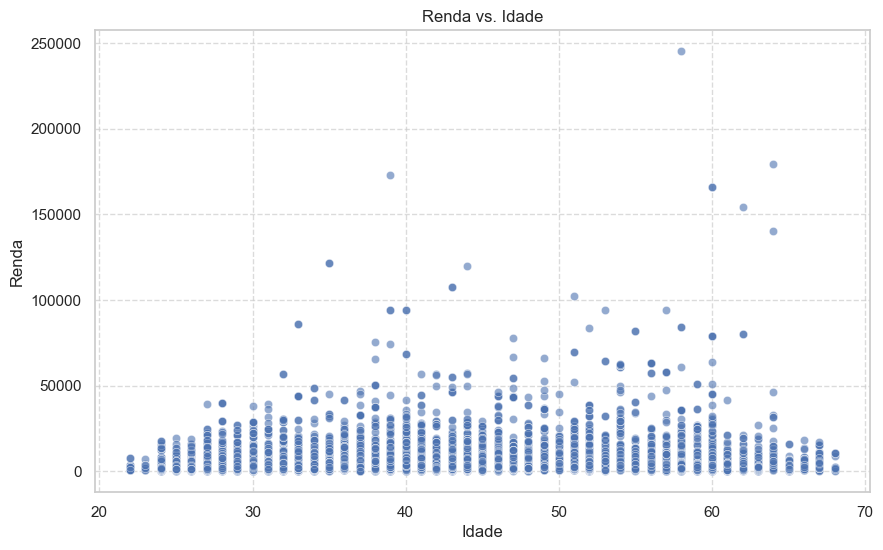

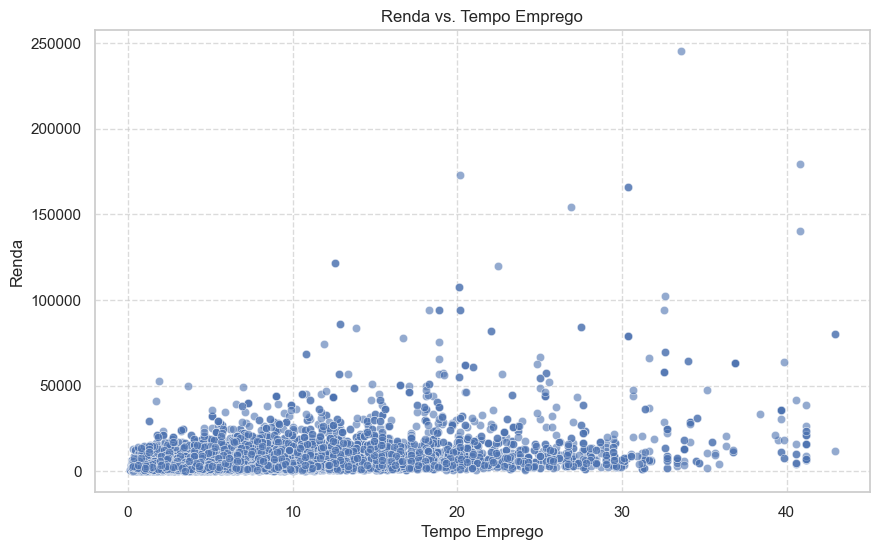

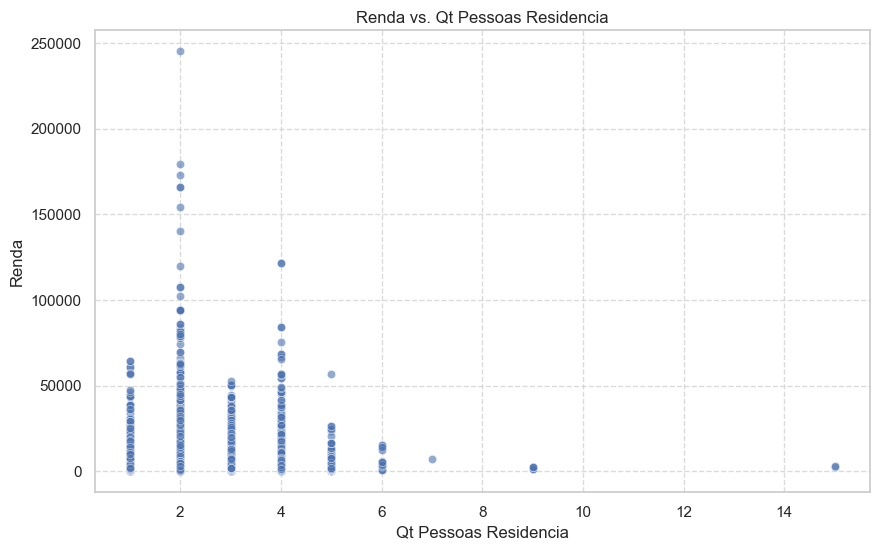


#### Matriz de Correlação das Variáveis Numéricas



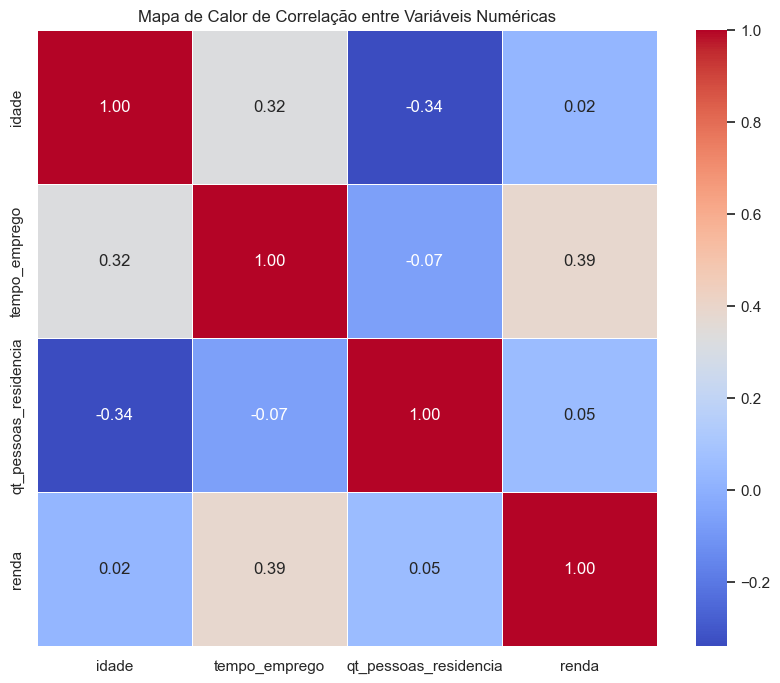

Observações da Matriz de Correlação: A intensidade e direção das cores indicam a força e o tipo da correlação entre as variáveis numéricas. Valores próximos de 1 ou -1 indicam correlações fortes.


### Relação entre Variáveis Categóricas/Booleanas e a Renda



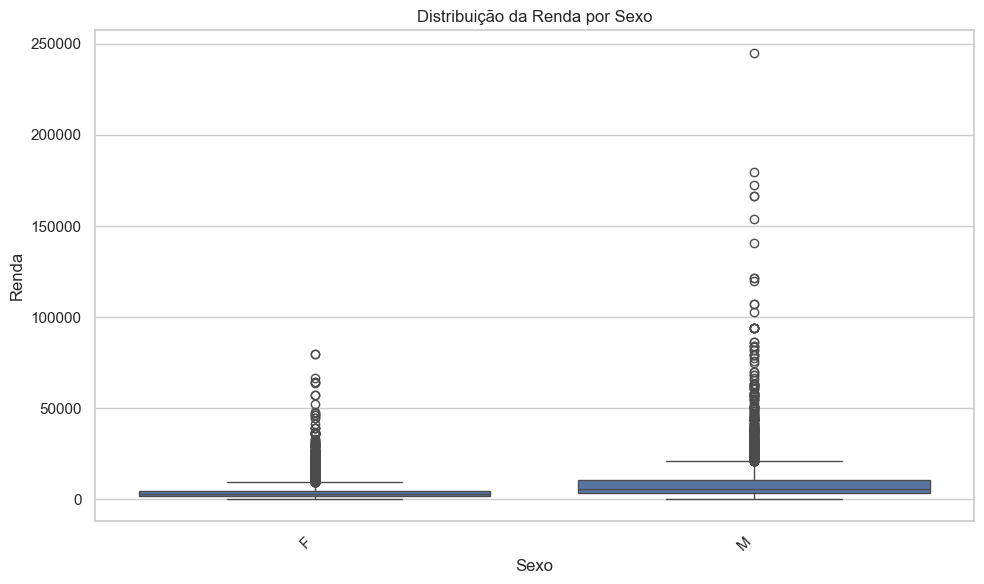

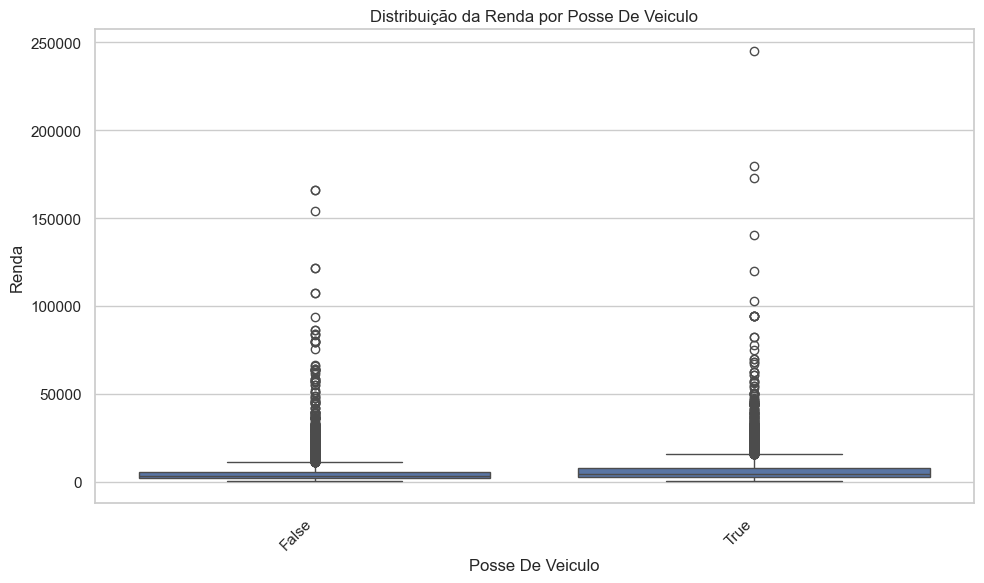

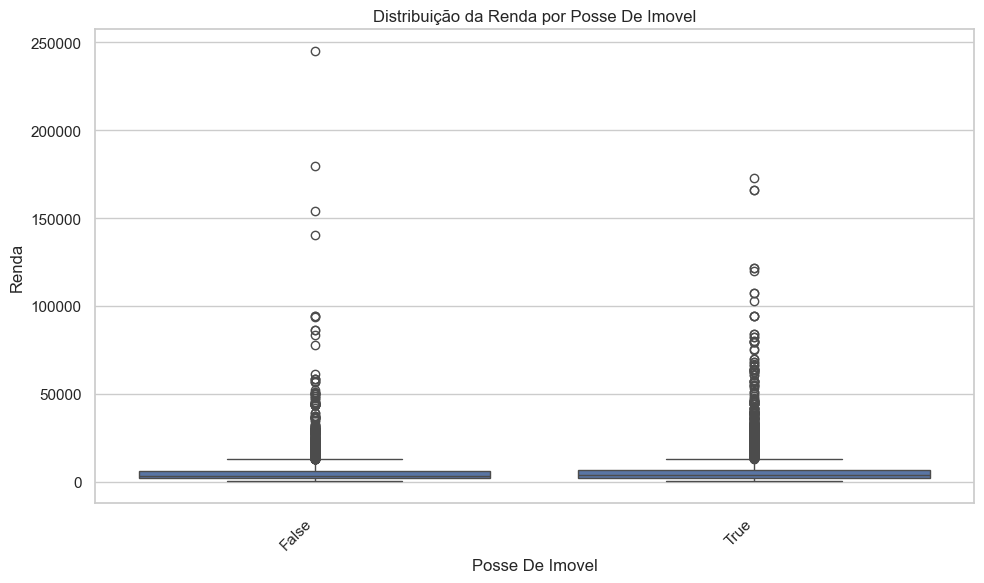

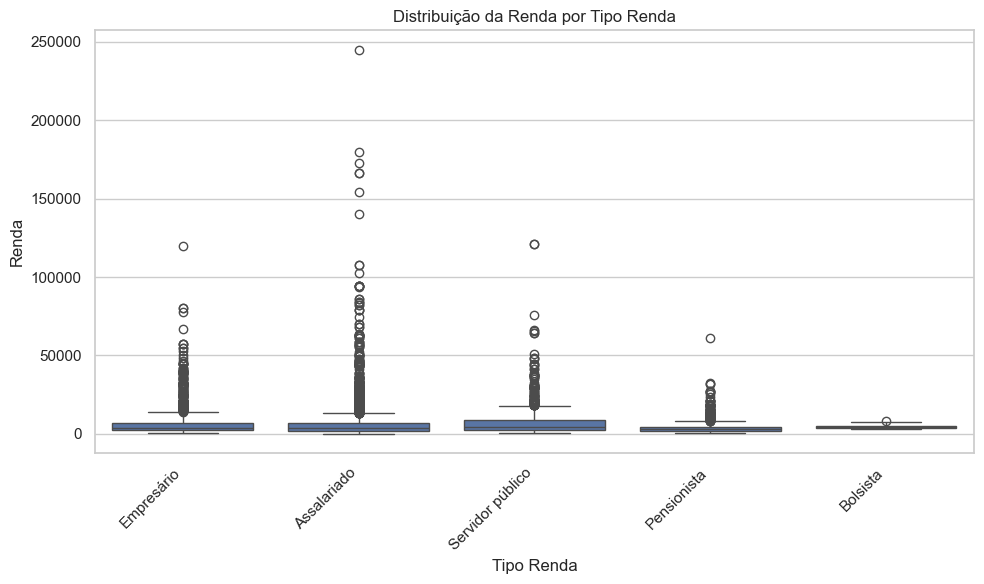

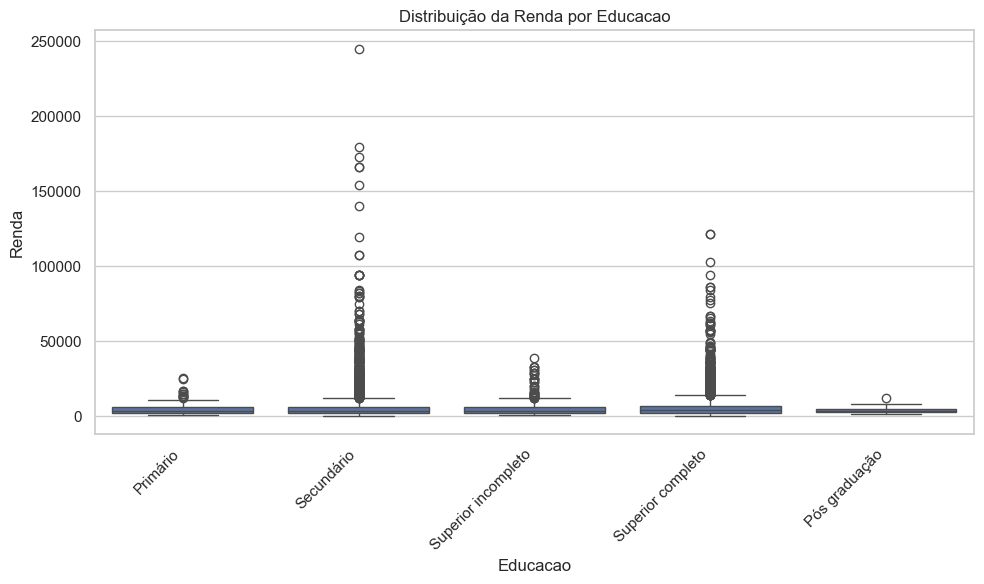

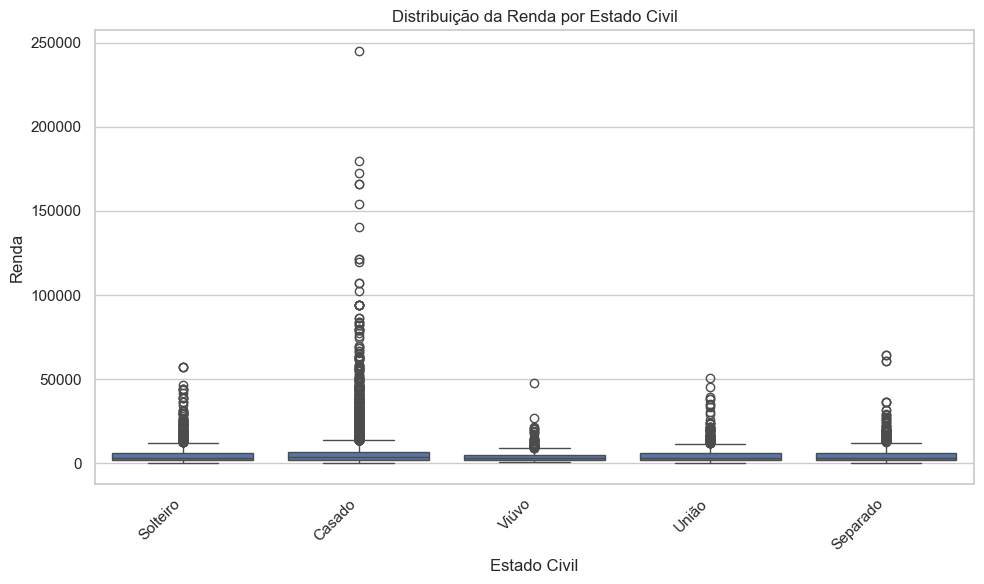

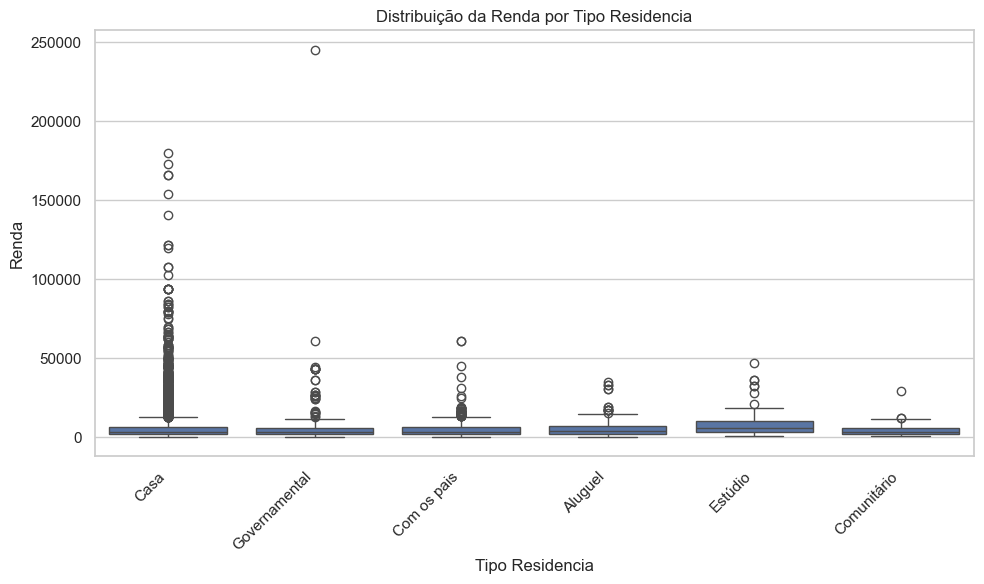

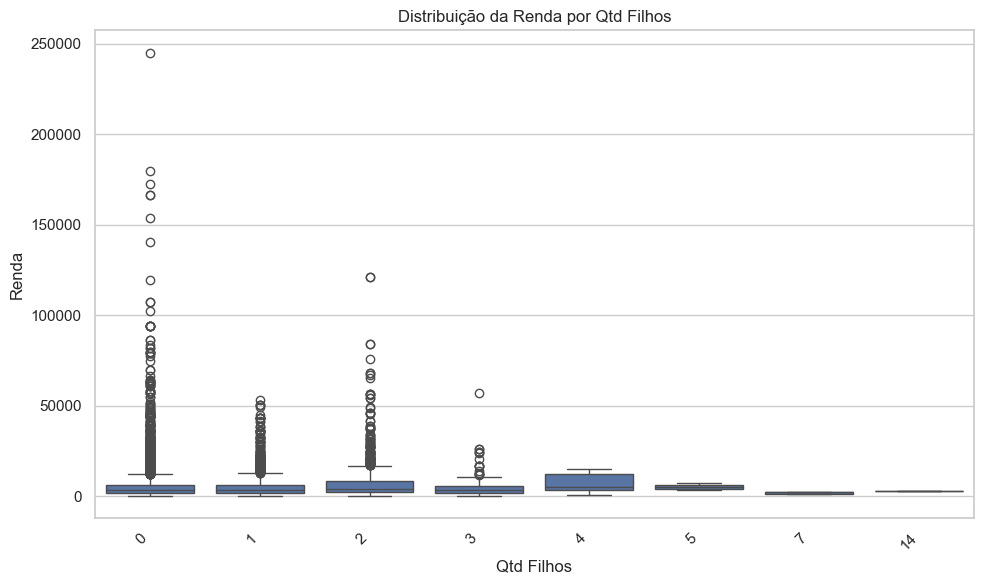

Observações dos Boxplots: Compare as medianas e a dispersão da renda entre as diferentes categorias. Identifique se há grupos com rendas significativamente diferentes. A presença de outliers também é visível aqui.


### Relação entre Variáveis Categóricas (Pares)



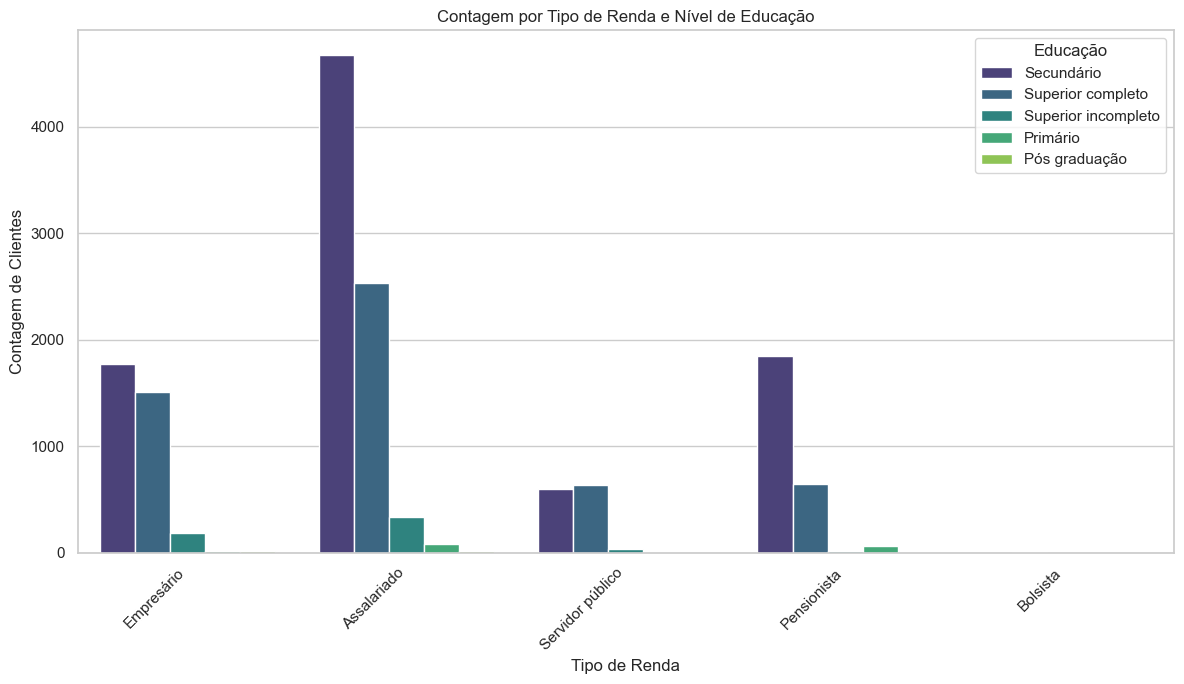


#### Tabelas de Contingência (Exemplos)

Tabela de Contingência: Sexo vs. Posse de Veículo

posse_de_veiculo  False  True 
sexo                          
F                  7395   2724
M                  1745   3136

---

Tabela de Contingência: Tipo de Residencia vs. Qtd Filhos

qtd_filhos         0     1     2    3   4   5   7   14
tipo_residencia                                       
Aluguel           133    47    14    0   0   0   0   0
Casa             9423  2672  1244  168  17   1   5   2
Com os pais       385   196    83   11   0   0   0   0
Comunitário        52     3     7    1   0   1   0   0
Estúdio            45    27    11    0   0   0   0   0
Governamental     338    92    17    5   0   0   0   0

Observações das Tabelas de Contingência: Verifique as distribuições conjuntas para entender a composição dos grupos. Por exemplo, qual tipo de residência é mais comum para famílias com mais filhos.


### Análise Temporal: Renda Média ao Longo do Tempo



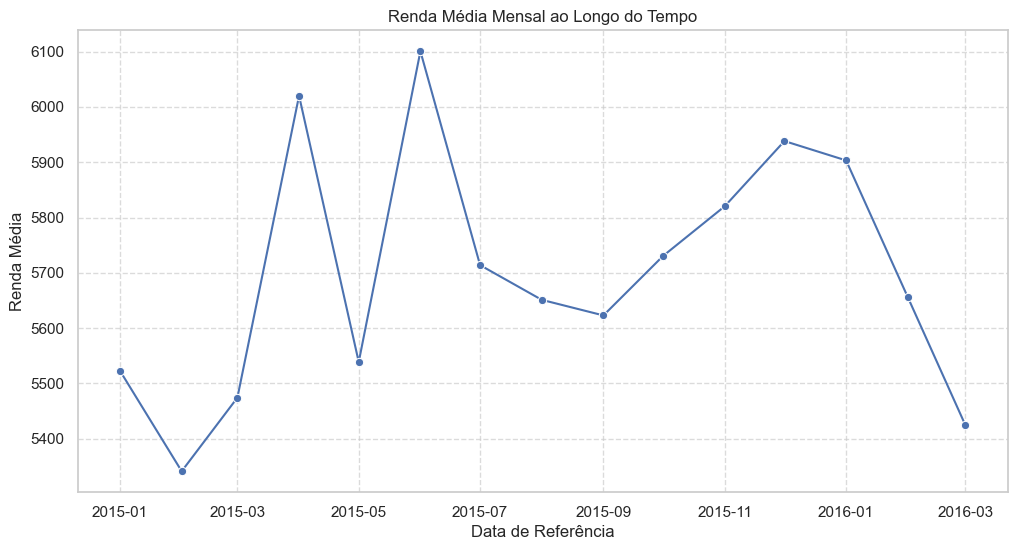


--- Fim da Análise Bivariada ---


In [57]:
# --- Configuração Inicial do Ambiente ---
# Esta linha é uma "magic command" do IPython/Jupyter que garante que os gráficos do matplotlib
# sejam exibidos diretamente no notebook, logo abaixo da célula de código que os gera.
# É fundamental para a visualização interativa no ambiente Jupyter.
%matplotlib inline

# --- Importação de Bibliotecas Necessárias ---
# É uma boa prática importar todas as bibliotecas no início do script para clareza e organização.
import pandas as pd             # Biblioteca fundamental para manipulação e análise de dados (DataFrames).
import seaborn as sns           # Biblioteca para visualização de dados estatísticos, construída sobre o matplotlib.
import matplotlib.pyplot as plt # Biblioteca para criação de gráficos estáticos e interativos.
import numpy as np              # Biblioteca para operações numéricas e arrays, útil para np.nan (valores nulos).
# from ydata_profiling import ProfileReport # Embora não seja usada diretamente neste script, é útil para entendimento univariado.

# --- 1. Carregamento do DataFrame 'renda' ---
# Carrega o conjunto de dados de um arquivo CSV localizado no caminho './input/previsao_de_renda.csv'.
# O DataFrame 'renda' conterá todas as informações dos clientes e suas respectivas rendas.
renda = pd.read_csv('./input/previsao_de_renda.csv')

# --- 2. Preparação Adicional dos Dados ---
# Converte a coluna 'data_ref' para o tipo datetime.
# Isso é crucial para realizar análises temporais, como agrupar dados por mês ou ano.
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

# --- 3. Configurações Globais para Visualização ---
# Define o tema padrão para os gráficos do Seaborn como 'whitegrid'.
# Isso adiciona um fundo branco com grades, melhorando a legibilidade dos gráficos.
sns.set_theme(style="whitegrid")
# Define o tamanho padrão das figuras (gráficos) geradas pelo matplotlib.
# Ajuda a manter uma consistência visual e a evitar gráficos muito pequenos ou grandes.
plt.rcParams['figure.figsize'] = (10, 6)

# --- Título da Seção de Análise Bivariada ---
print("--- Entendimento dos Dados - Bivariadas ---")
print("\nExplorando as relações entre pares de variáveis e a variável alvo 'renda'.\n")

# --- 4. Análise da Relação entre Variáveis Numéricas e a Renda ---
print("### Relação entre Variáveis Numéricas e a Renda\n")

# Define uma lista das colunas numéricas que serão analisadas em relação à 'renda'.
# 'Unnamed: 0' e 'id_cliente' são tipicamente identificadores e não são relevantes para correlação direta.
numeric_cols = ['idade', 'tempo_emprego', 'qt_pessoas_residencia']

# Itera sobre cada coluna numérica para criar um gráfico de dispersão com a 'renda'.
for col in numeric_cols:
    plt.figure() # Cria uma nova figura para cada gráfico, evitando sobreposição.
    
    # Remove linhas com valores nulos (NaN) nas colunas 'col' ou 'renda' para o gráfico atual.
    # Isso garante que o scatter plot não tente plotar valores ausentes, o que causaria erros.
    df_plot = renda.dropna(subset=[col, 'renda'])
    
    # Cria um gráfico de dispersão (scatter plot) para visualizar a relação entre 'col' e 'renda'.
    # 'alpha=0.6' adiciona transparência aos pontos, útil para identificar áreas com alta densidade de dados.
    sns.scatterplot(x=col, y='renda', data=df_plot, alpha=0.6)
    
    # Define o título do gráfico, formatando o nome da coluna para melhor legibilidade.
    plt.title(f'Renda vs. {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title()) # Rótulo do eixo X.
    plt.ylabel('Renda') # Rótulo do eixo Y.
    plt.grid(True, linestyle='--', alpha=0.7) # Adiciona uma grade ao gráfico para facilitar a leitura.
    plt.show() # Exibe o gráfico gerado.
    plt.close() # Fecha a figura atual para liberar memória. Essencial em loops para evitar o aviso "More than 20 figures".

print("\n#### Matriz de Correlação das Variáveis Numéricas\n")
# Adiciona a coluna 'renda' à lista de colunas numéricas para incluir na matriz de correlação.
all_numeric_for_corr = numeric_cols + ['renda']
# Calcula a matriz de correlação de Pearson para as colunas numéricas selecionadas.
correlation_matrix = renda[all_numeric_for_corr].corr()

plt.figure(figsize=(10, 8)) # Cria uma figura para o heatmap da matriz de correlação.
# Cria um mapa de calor (heatmap) para visualizar as correlações.
# 'annot=True' exibe os valores das correlações nas células.
# 'cmap='coolwarm'' define o esquema de cores, onde cores quentes indicam correlação positiva e frias, negativa.
# 'fmt=".2f"' formata os valores para duas casas decimais.
# 'linewidths=.5' adiciona linhas entre as células.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlação entre Variáveis Numéricas') # Título do heatmap.
plt.show() # Exibe o heatmap.
plt.close() # Fecha a figura.
print("Observações da Matriz de Correlação: A intensidade e direção das cores indicam a força e o tipo da correlação entre as variáveis numéricas. Valores próximos de 1 ou -1 indicam correlações fortes.\n")

# --- 5. Análise da Relação entre Variáveis Categóricas/Booleanas e a Renda ---
print("\n### Relação entre Variáveis Categóricas/Booleanas e a Renda\n")

# Define uma lista das colunas categóricas e booleanas para análise.
# 'qtd_filhos' é incluída aqui porque, embora numérica, suas categorias (0, 1, 2, etc.)
# são tratadas como grupos distintos para análise de renda.
categorical_cols = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
                    'educacao', 'estado_civil', 'tipo_residencia', 'qtd_filhos']

# Itera sobre cada coluna categórica para criar um boxplot da 'renda' por categoria.
for col in categorical_cols:
    plt.figure() # Cria uma nova figura para cada boxplot.
    
    # Lógica para ordenar as categorias no eixo X de forma significativa, se aplicável.
    if col in ['educacao']: # Ordena a educação por nível crescente de escolaridade.
         order_ = ['Primário', 'Secundário', 'Superior incompleto', 'Superior completo', 'Pós graduação']
         sns.boxplot(x=col, y='renda', data=renda, order=order_)
    elif col in ['qtd_filhos']: # Ordena a quantidade de filhos numericamente.
        order_ = sorted(renda[col].unique())
        sns.boxplot(x=col, y='renda', data=renda, order=order_)
    else: # Para outras categóricas (sexo, posse_de_veiculo, etc.), a ordem padrão é usada.
        sns.boxplot(x=col, y='renda', data=renda)

    plt.title(f'Distribuição da Renda por {col.replace("_", " ").title()}') # Título do gráfico.
    plt.xlabel(col.replace("_", " ").title()) # Rótulo do eixo X.
    plt.ylabel('Renda') # Rótulo do eixo Y.
    plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para evitar sobreposição.
    plt.tight_layout() # Ajusta o layout para evitar que rótulos se sobreponham.
    plt.show() # Exibe o boxplot.
    plt.close() # Fecha a figura.
print("Observações dos Boxplots: Compare as medianas e a dispersão da renda entre as diferentes categorias. Identifique se há grupos com rendas significativamente diferentes. A presença de outliers também é visível aqui.\n")


# --- 6. Análise da Relação entre Variáveis Categóricas (Pares) ---
print("\n### Relação entre Variáveis Categóricas (Pares)\n")

# Exemplo de visualização da distribuição conjunta de duas variáveis categóricas usando um countplot.
plt.figure(figsize=(12, 7))
sns.countplot(x='tipo_renda', hue='educacao', data=renda, palette='viridis')
plt.title('Contagem por Tipo de Renda e Nível de Educação')
plt.xlabel('Tipo de Renda')
plt.ylabel('Contagem de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Educação') # Adiciona uma legenda para a variável 'hue'.
plt.tight_layout()
plt.show()
plt.close() # Fecha a figura.

print("\n#### Tabelas de Contingência (Exemplos)\n")
# Cria e imprime uma tabela de contingência para 'sexo' vs. 'posse_de_veiculo'.
# Mostra a frequência conjunta de cada combinação de categorias.
print("Tabela de Contingência: Sexo vs. Posse de Veículo\n")
print(pd.crosstab(renda['sexo'], renda['posse_de_veiculo']))
print("\n---\n")

# Cria e imprime uma tabela de contingência para 'tipo_residencia' vs. 'qtd_filhos'.
print("Tabela de Contingência: Tipo de Residencia vs. Qtd Filhos\n")
print(pd.crosstab(renda['tipo_residencia'], renda['qtd_filhos']))
print("\nObservações das Tabelas de Contingência: Verifique as distribuições conjuntas para entender a composição dos grupos. Por exemplo, qual tipo de residência é mais comum para famílias com mais filhos.\n")


# --- 7. Análise Temporal (Renda Média ao Longo do Tempo) ---
print("\n### Análise Temporal: Renda Média ao Longo do Tempo\n")

# Agrupa o DataFrame pela coluna 'data_ref' (convertida para período mensal)
# e calcula a média da 'renda' para cada mês.
renda_mensal = renda.groupby(renda['data_ref'].dt.to_period('M'))['renda'].mean().reset_index()
# Converte o período mensal de volta para timestamp para que o Seaborn plote o eixo X corretamente.
renda_mensal['data_ref'] = renda_mensal['data_ref'].dt.to_timestamp()

plt.figure(figsize=(12, 6)) # Cria uma figura para o gráfico de linha.
# Cria um gráfico de linha para visualizar a 'renda' média ao longo do tempo.
# 'marker='o'' adiciona marcadores para cada ponto de dados.
# 'linestyle='-'' define a linha contínua entre os pontos.
sns.lineplot(x='data_ref', y='renda', data=renda_mensal, marker='o', linestyle='-')
plt.title('Renda Média Mensal ao Longo do Tempo') # Título do gráfico.
plt.xlabel('Data de Referência') # Rótulo do eixo X.
plt.ylabel('Renda Média') # Rótulo do eixo Y.
plt.grid(True, linestyle='--', alpha=0.7) # Adiciona grade.
plt.show() # Exibe o gráfico.
plt.close() # Fecha a figura.

print("\n--- Fim da Análise Bivariada ---")

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [58]:
print("\n--- Etapa 3 CRISP-DM: Preparação dos Dados ---")
print("\n### 1. Seleção de Dados ###")

print("\nShape do DataFrame ANTES da seleção:")
print(renda.shape)
print("Colunas do DataFrame ANTES da seleção:")
print(renda.columns.tolist())

# Remover as colunas 'Unnamed: 0' e 'id_cliente'
# 'inplace=True' modifica o DataFrame 'renda' diretamente.
# 'axis=1' especifica que estamos removendo colunas.
renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

print("\nShape do DataFrame DEPOIS da seleção:")
print(renda.shape)
print("Colunas do DataFrame DEPOIS da seleção:")
print(renda.columns.tolist())

print("\nPrimeiras 5 linhas do DataFrame após a seleção de colunas:")
print(renda.head())

print("\nSeleção de dados concluída. Seguimos para a próxima etapa: Limpeza de Dados.")


--- Etapa 3 CRISP-DM: Preparação dos Dados ---

### 1. Seleção de Dados ###

Shape do DataFrame ANTES da seleção:
(15000, 15)
Colunas do DataFrame ANTES da seleção:
['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

Shape do DataFrame DEPOIS da seleção:
(15000, 13)
Colunas do DataFrame DEPOIS da seleção:
['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

Primeiras 5 linhas do DataFrame após a seleção de colunas:
    data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0 2015-01-01    F             False             True           0   
1 2015-01-01    M              True             True           0   
2 2015-01-01    F              True             True         

In [59]:
print("\n--- Etapa 3 CRISP-DM: Preparação dos Dados ---")
print("\n### 2. Limpeza de Dados ###")

# --- Identificar e Contar Valores Faltantes ---
print("Verificando valores nulos ANTES da limpeza:")
print(renda.isnull().sum())

# --- Tratamento de Valores Faltantes em 'tempo_emprego' ---
mediana_tempo_emprego = renda['tempo_emprego'].median()

print(f"\nMediana de 'tempo_emprego' calculada para imputação: {mediana_tempo_emprego:.2f}")

# Substituir .fillna(..., inplace=True)
# pela atribuição direta para evitar o FutureWarning e garantir a modificação no DataFrame original.
renda['tempo_emprego'] = renda['tempo_emprego'].fillna(mediana_tempo_emprego)

print("\nValores nulos DEPOIS da limpeza:")
print(renda.isnull().sum())

print("\nPrimeiras 5 linhas do DataFrame após a limpeza de dados (coluna 'tempo_emprego' preenchida):")
print(renda.head())

print("\nLimpeza de dados concluída. Seguimos para a próxima etapa: Construção de Novas Variáveis.")
print("\n" + "="*50 + "\n")


--- Etapa 3 CRISP-DM: Preparação dos Dados ---

### 2. Limpeza de Dados ###
Verificando valores nulos ANTES da limpeza:
data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

Mediana de 'tempo_emprego' calculada para imputação: 6.01

Valores nulos DEPOIS da limpeza:
data_ref                 0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

Primeiras 5 linhas

In [60]:
print("\n--- Etapa 3 CRISP-DM: Preparação dos Dados ---")
print("\n### 3. Construção de Novas Variáveis (Feature Engineering) ###")

print("Shape do DataFrame ANTES da construção de variáveis:")
print(renda.shape)
print("Colunas do DataFrame ANTES da construção de variáveis:")
print(renda.columns.tolist())
print("\n--- Exemplos de dados ANTES da construção ---\n")
print(renda[['data_ref', 'idade']].head())

# --- Ação 1: Extrair Mês e Ano de 'data_ref' ---
print("\n#### Extraindo 'mes_ref' e 'ano_ref' de 'data_ref' ####")
renda['mes_ref'] = renda['data_ref'].dt.month # Extrai o número do mês (1-12)
renda['ano_ref'] = renda['data_ref'].dt.year   # Extrai o ano
print("\nPrimeiras 5 linhas após extração de mês e ano:")
print(renda[['data_ref', 'mes_ref', 'ano_ref']].head())

# --- Ação 2: Criar Faixas Etárias para 'idade' ---
print("\n#### Criando 'faixa_idade' a partir de 'idade' ####")
# Definindo os limites (bins) para as faixas etárias.
# O limite inferior é inclusivo, o superior é exclusivo por padrão (right=True).
# right=False significa [início, fim)
bins_idade = [0, 18, 30, 45, 60, 100]
# Rótulos correspondentes para cada faixa etária.
labels_idade = ['0-18', '19-30', '31-45', '46-60', '61+']
# Usa pd.cut para categorizar a coluna 'idade' nas faixas definidas.
renda['faixa_idade'] = pd.cut(renda['idade'], bins=bins_idade, labels=labels_idade, right=False)
print("\nPrimeiras 5 linhas após criação de faixa_idade:")
print(renda[['idade', 'faixa_idade']].head())
print("\nContagem de valores na nova coluna 'faixa_idade':")
print(renda['faixa_idade'].value_counts().sort_index())

# --- Ação 3 (Opcional/Discussão): 'adultos_na_residencia' ---
# Para este projeto, manteremos 'qtd_filhos' e 'qt_pessoas_residencia' separadas,
# pois a relação delas com a renda pode ser mais complexa do que uma simples diferença.
# No entanto, em outras análises, você poderia considerar:
# renda['adultos_na_residencia'] = renda['qt_pessoas_residencia'] - renda['qtd_filhos']
# print("\nNova coluna 'adultos_na_residencia' (se criada):")
# print(renda[['qtd_filhos', 'qt_pessoas_residencia', 'adultos_na_residencia']].head())

print("\nShape do DataFrame DEPOIS da construção de variáveis:")
print(renda.shape)
print("Novas colunas adicionadas:")
# Mostra apenas as colunas que foram criadas ou modificadas para serem novas features
novas_cols = ['mes_ref', 'ano_ref', 'faixa_idade']
print(renda[novas_cols].head())
print("\nColunas do DataFrame DEPOIS da construção de variáveis:")
print(renda.columns.tolist())


print("\nConstrução de novas variáveis concluída. Seguimos para a próxima etapa: Integração de Dados.")
print("\n" + "="*50 + "\n")



--- Etapa 3 CRISP-DM: Preparação dos Dados ---

### 3. Construção de Novas Variáveis (Feature Engineering) ###
Shape do DataFrame ANTES da construção de variáveis:
(15000, 13)
Colunas do DataFrame ANTES da construção de variáveis:
['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

--- Exemplos de dados ANTES da construção ---

    data_ref  idade
0 2015-01-01     26
1 2015-01-01     28
2 2015-01-01     35
3 2015-01-01     30
4 2015-01-01     33

#### Extraindo 'mes_ref' e 'ano_ref' de 'data_ref' ####

Primeiras 5 linhas após extração de mês e ano:
    data_ref  mes_ref  ano_ref
0 2015-01-01        1     2015
1 2015-01-01        1     2015
2 2015-01-01        1     2015
3 2015-01-01        1     2015
4 2015-01-01        1     2015

#### Criando 'faixa_idade' a partir de 'idade' ####

Primeiras 5 linhas após criação de faixa_idade:
   idade fai

In [61]:
print("\n--- Etapa 3 CRISP-DM: Preparação dos Dados ---")
print("\n### 4. Integração de Dados ###")

print("Análise:")
print("Neste projeto, estamos utilizando apenas uma única fonte de dados (o arquivo 'previsao_de_renda.csv').")
print("Portanto, não é necessário realizar operações de integração, como junções ou fusões de DataFrames,")
print("visto que todas as informações relevantes já estão contidas em nosso DataFrame 'renda'.")

print("\n--- Nenhuma ação de codificação necessária para esta sub-etapa. ---")

print("\nShape do DataFrame 'renda' após as etapas anteriores (seleção, limpeza, construção):")
print(renda.shape)
print("Colunas atuais do DataFrame 'renda':")
print(renda.columns.tolist())
print("\nPrimeiras 5 linhas do DataFrame 'renda' antes da próxima etapa:")
print(renda.head())

print("\nIntegração de dados validada (não aplicável). Seguimos para a próxima etapa: Formatação.")
print("\n" + "="*50 + "\n")


--- Etapa 3 CRISP-DM: Preparação dos Dados ---

### 4. Integração de Dados ###
Análise:
Neste projeto, estamos utilizando apenas uma única fonte de dados (o arquivo 'previsao_de_renda.csv').
Portanto, não é necessário realizar operações de integração, como junções ou fusões de DataFrames,
visto que todas as informações relevantes já estão contidas em nosso DataFrame 'renda'.

--- Nenhuma ação de codificação necessária para esta sub-etapa. ---

Shape do DataFrame 'renda' após as etapas anteriores (seleção, limpeza, construção):
(15000, 16)
Colunas atuais do DataFrame 'renda':
['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'mes_ref', 'ano_ref', 'faixa_idade']

Primeiras 5 linhas do DataFrame 'renda' antes da próxima etapa:
    data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0 2015-01-01    F             False             True

In [62]:
print("\n--- Etapa 3 CRISP-DM: Preparação dos Dados ---")
print("\n### 5. Formatação de Dados ###")

print("Shape do DataFrame ANTES da formatação:")
print(renda.shape)
print("Tipos de dados ANTES da formatação:")
print(renda.info())

# --- Ação 1: Converter variáveis booleanas para inteiro (0 e 1) ---
print("\n#### Convertendo variáveis booleanas para inteiro (0 e 1) ####")
# Converte as colunas 'posse_de_veiculo' e 'posse_de_imovel' do tipo booleano para int (True -> 1, False -> 0).
renda['posse_de_veiculo'] = renda['posse_de_veiculo'].astype(int)
renda['posse_de_imovel'] = renda['posse_de_imovel'].astype(int)
print("\nPrimeiras 5 linhas das colunas booleanas convertidas:")
print(renda[['posse_de_veiculo', 'posse_de_imovel']].head())

# --- Ação 2: Aplicar One-Hot Encoding para variáveis categóricas ---
print("\n#### Aplicando One-Hot Encoding para variáveis categóricas ####")
# Lista das colunas categóricas que precisam ser transformadas.
# Incluímos as novas variáveis categóricas criadas na etapa de construção ('mes_ref', 'ano_ref', 'faixa_idade').
# 'data_ref' original será removida.
categorical_cols_for_ohe = [
    'sexo', 'tipo_renda', 'educacao', 'estado_civil',
    'tipo_residencia', 'mes_ref', 'ano_ref', 'faixa_idade'
]

print(f"\nColunas para One-Hot Encoding: {categorical_cols_for_ohe}")

# Aplica One-Hot Encoding ao DataFrame.
# 'columns' especifica quais colunas devem ser transformadas.
# 'drop_first=True' evita a multicolinearidade, removendo a primeira categoria de cada variável original.
# O resultado é um novo DataFrame com as variáveis categóricas expandidas em colunas binárias.
renda_final = pd.get_dummies(renda, columns=categorical_cols_for_ohe, drop_first=True)

# --- Ação 3: Remover a coluna 'data_ref' original ---
# Como extraímos 'mes_ref' e 'ano_ref' dela e fizemos One-Hot Encoding nestas,
# a coluna 'data_ref' original não é mais necessária para a modelagem.
renda_final.drop(columns=['data_ref'], inplace=True)

print("\nShape do DataFrame DEPOIS da formatação:")
print(renda_final.shape)
print("Tipos de dados DEPOIS da formatação (observe novas colunas 'dummy' e colunas booleanas como int):")
print(renda_final.info())

print("\nPrimeiras 5 linhas do DataFrame FINAL após formatação:")
print(renda_final.head())


print("\n" + "="*50 + "\n")
print("--- Fim da Etapa 3 CRISP-DM: Preparação dos Dados ---")
print("\nO DataFrame 'renda_final' agora está completamente preparado e formatado para a fase de Modelagem.")


--- Etapa 3 CRISP-DM: Preparação dos Dados ---

### 5. Formatação de Dados ###
Shape do DataFrame ANTES da formatação:
(15000, 16)
Tipos de dados ANTES da formatação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   sexo                   15000 non-null  object        
 2   posse_de_veiculo       15000 non-null  bool          
 3   posse_de_imovel        15000 non-null  bool          
 4   qtd_filhos             15000 non-null  int64         
 5   tipo_renda             15000 non-null  object        
 6   educacao               15000 non-null  object        
 7   estado_civil           15000 non-null  object        
 8   tipo_residencia        15000 non-null  object        
 9   idade                  15000 non-null  int64         
 10  tempo_empr

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [63]:
print("Técnica de Modelagem selecionada: Random Forest Regressor (sklearn.ensemble.RandomForestRegressor)")
print("\nEstamos prontos para usar este modelo na etapa de Desenho do Teste e Treinamento.")

Técnica de Modelagem selecionada: Random Forest Regressor (sklearn.ensemble.RandomForestRegressor)

Estamos prontos para usar este modelo na etapa de Desenho do Teste e Treinamento.


In [64]:
print("\n--- Etapa 4 CRISP-DM: Modelagem ---")
print("\n### 2. Desenho do Teste ###")

print("\n--- Análise da Coluna 'data_ref' para Divisão Temporal ---")
print(f"Período de dados no DataFrame: {renda['data_ref'].min().strftime('%Y-%m-%d')} a {renda['data_ref'].max().strftime('%Y-%m-%d')}")

# Escolhendo um ponto de corte temporal para a divisão treino-teste.
# A escolha exata dependerá da distribuição das datas no seu dataset real.
# Por exemplo, se você tiver dados de 2015 a 2017, poderia usar 2017-01-01 como corte.
# Para este exemplo, vamos escolher um ponto de corte que divida o dataset em proporções razoáveis.
# Vou escolher uma data que seja aproximadamente 70-80% do caminho do seu dataset (o dataset do curso tem 15000 linhas, 2015-01-01 a 2016-03-01)
# Uma data de corte comum poderia ser a primeira data de um dos últimos meses do dataset, por exemplo, o último mês de 2015
# Para o dataset de exemplo, vamos usar '2015-02-15'
cut_off_date = renda['data_ref'].max() - pd.DateOffset(months=3) # Ex: 3 meses antes da última data
print(f"\nData de corte para a divisão treino-teste: {cut_off_date.strftime('%Y-%m-%d')}")

# --- Separar o DataFrame em conjuntos de Treinamento e Teste ---
# Dados de treinamento: Todas as observações cuja 'data_ref' é ANTES ou IGUAL à data de corte.
X_train = renda_final[renda['data_ref'] <= cut_off_date].drop('renda', axis=1)
y_train = renda_final[renda['data_ref'] <= cut_off_date]['renda']

# Dados de teste: Todas as observações cuja 'data_ref' é DEPOIS da data de corte.
X_test = renda_final[renda['data_ref'] > cut_off_date].drop('renda', axis=1)
y_test = renda_final[renda['data_ref'] > cut_off_date]['renda']


print(f"\nShape de X_train: {X_train.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\nVerificando se as colunas são consistentes entre treino e teste (muito importante após One-Hot Encoding):")
# É crucial que X_train e X_test tenham as mesmas colunas na mesma ordem após One-Hot Encoding.
# Se alguma categoria de uma variável categórica aparecer apenas em treino ou apenas em teste,
# o get_dummies pode gerar um número diferente de colunas.
# Isso pode ser resolvido com pd.reindex ou garantindo que todas as categorias possíveis são conhecidas antes do OHE.
# Por enquanto, vamos apenas verificar se o número de colunas é o mesmo.
if X_train.shape[1] == X_test.shape[1]:
    print("Número de colunas consistente entre X_train e X_test.")
else:
    print("AVISO: O número de colunas NÃO é consistente entre X_train e X_test. Isso pode causar problemas na modelagem.")
    print("Colunas em X_train:", X_train.columns.tolist())
    print("Colunas em X_test:", X_test.columns.tolist())
    # Em um cenário real, você precisaria de um tratamento mais robusto aqui, como:
    # missing_cols_in_test = set(X_train.columns) - set(X_test.columns)
    # for c in missing_cols_in_test: X_test[c] = 0
    # missing_cols_in_train = set(X_test.columns) - set(X_train.columns)
    # for c in missing_cols_in_train: X_train[c] = 0
    # X_test = X_test[X_train.columns] # Reordena para garantir a mesma ordem

print("\nDesenho do teste concluído: Dados divididos em conjuntos de treinamento e teste baseados na data.")
print("Estamos prontos para a próxima etapa: Avaliação do Modelo (que incluirá o treinamento).")
print("\n" + "="*50 + "\n")



--- Etapa 4 CRISP-DM: Modelagem ---

### 2. Desenho do Teste ###

--- Análise da Coluna 'data_ref' para Divisão Temporal ---
Período de dados no DataFrame: 2015-01-01 a 2016-03-01

Data de corte para a divisão treino-teste: 2015-12-01

Shape de X_train: (12000, 40)
Shape de y_train: (12000,)
Shape de X_test: (3000, 40)
Shape de y_test: (3000,)

Verificando se as colunas são consistentes entre treino e teste (muito importante após One-Hot Encoding):
Número de colunas consistente entre X_train e X_test.

Desenho do teste concluído: Dados divididos em conjuntos de treinamento e teste baseados na data.
Estamos prontos para a próxima etapa: Avaliação do Modelo (que incluirá o treinamento).





--- Etapa 4 CRISP-DM: Modelagem ---

### 3. Avaliação do Modelo ###

--- Treinando e Avaliando: LinearRegression ---
Modelo LinearRegression treinado com sucesso.
  MSE: 44133386.99
  RMSE: 6643.30
  MAE: 3650.84
  R2: 0.2818


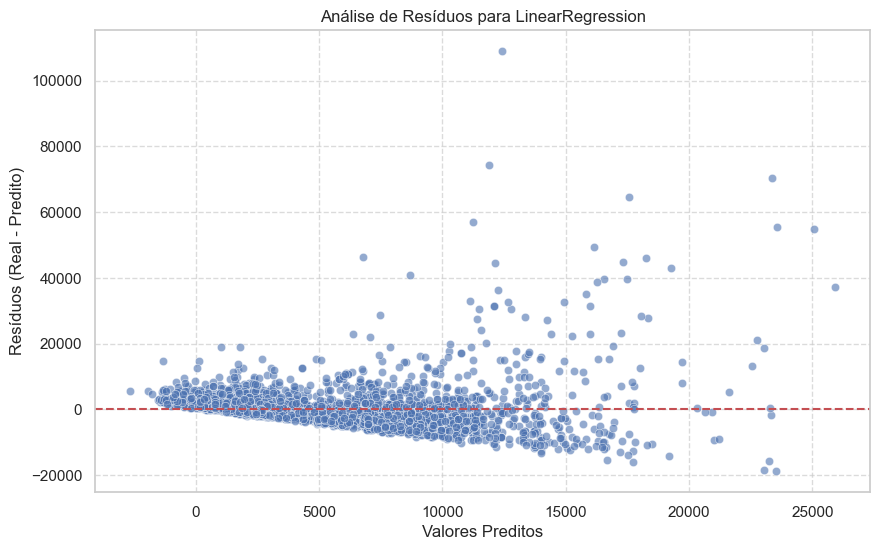

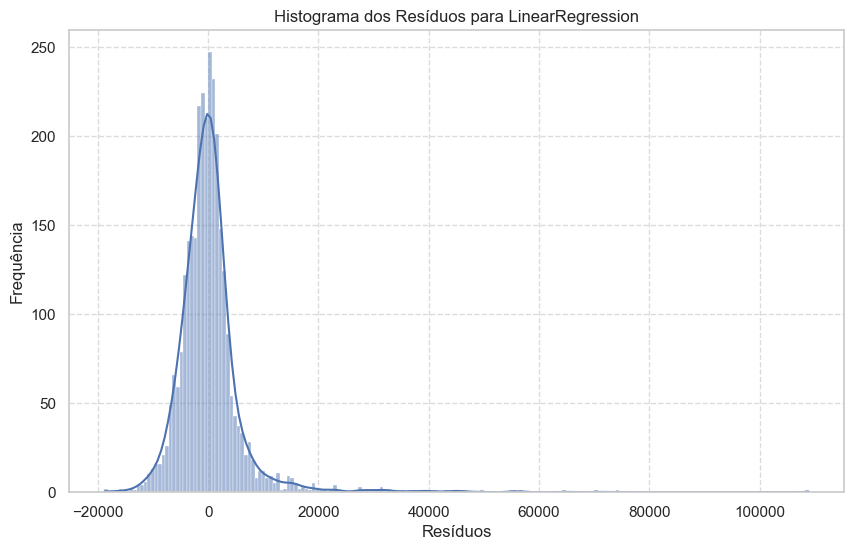


--- Treinando e Avaliando: RandomForestRegressor ---
Modelo RandomForestRegressor treinado com sucesso.
  MSE: 36594502.70
  RMSE: 6049.34
  MAE: 3066.82
  R2: 0.4045


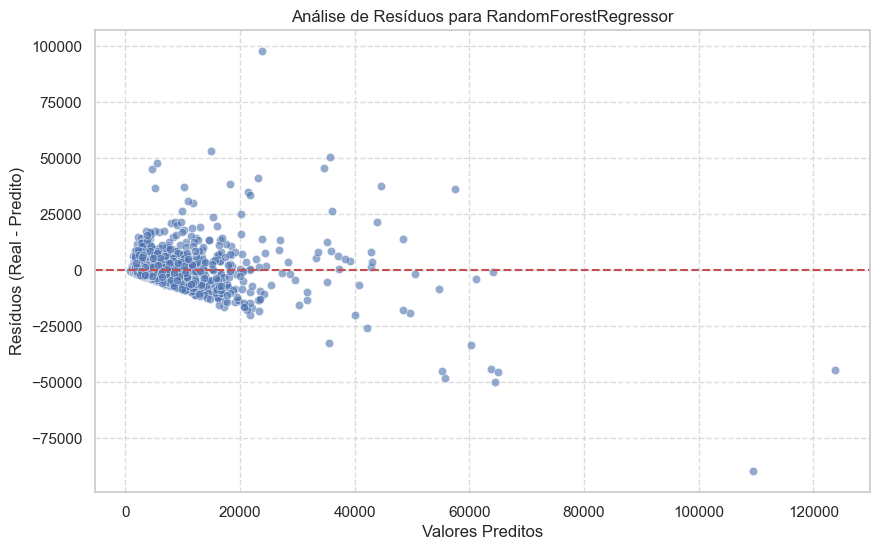

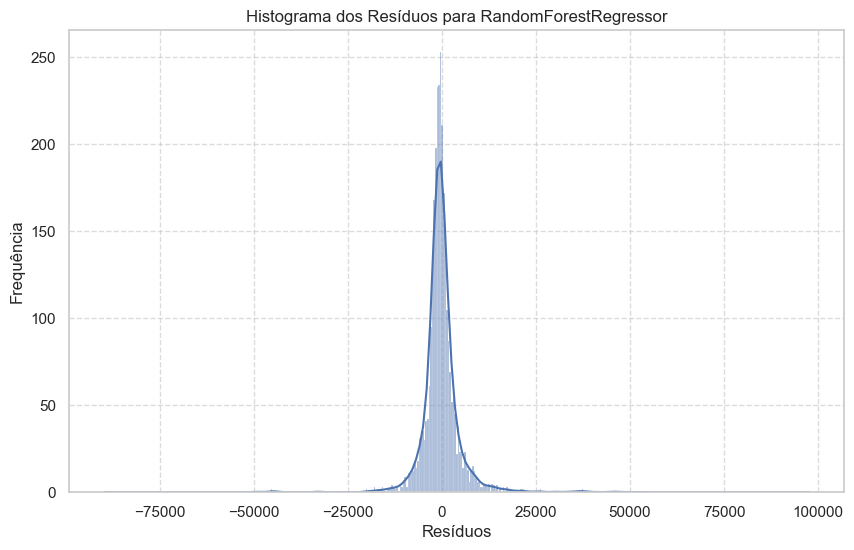


--- Treinando e Avaliando: LGBMRegressor ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 38
[LightGBM] [Info] Start training from score 5706.303049
Modelo LGBMRegressor treinado com sucesso.
  MSE: 34039874.66
  RMSE: 5834.37
  MAE: 3153.95
  R2: 0.4460


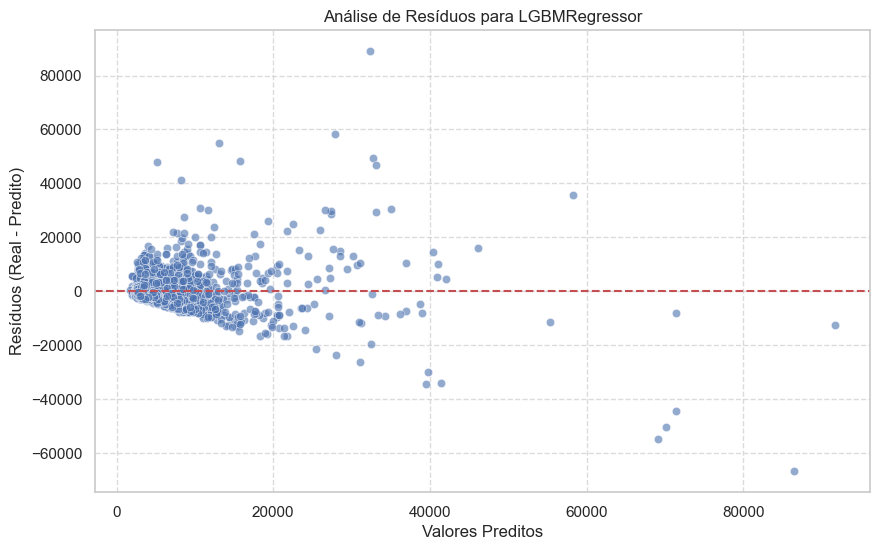

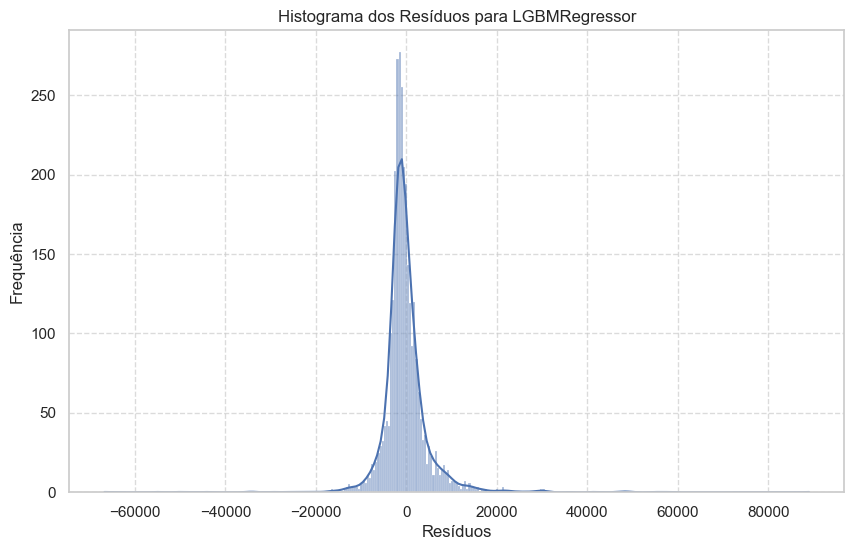


--- Sumário de Resultados dos Modelos ---
                                MSE         RMSE          MAE        R2
LinearRegression       4.413339e+07  6643.296395  3650.839427  0.281763
RandomForestRegressor  3.659450e+07  6049.339030  3066.818497  0.404453
LGBMRegressor          3.403987e+07  5834.370117  3153.946085  0.446027

--- Interpretação dos Resultados ---
RMSE e MAE: Quanto menores, melhor (indicam menor erro nas previsões).
R2: Quanto mais próximo de 1, melhor (indica que o modelo explica mais a variância da renda).
Análise dos resíduos: idealmente, os resíduos devem ser distribuídos aleatoriamente em torno de zero, sem padrões visíveis.
Modelos com menores RMSE/MAE e R2 mais próximo de 1 são geralmente considerados melhores.


Avaliação dos Modelos concluída.


In [65]:
print("\n--- Etapa 4 CRISP-DM: Modelagem ---")
print("\n### 3. Avaliação do Modelo ###")

# Dicionário para armazenar os modelos e suas métricas
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42), # random_state para reprodutibilidade
    'LGBMRegressor': LGBMRegressor(random_state=42) # random_state para reprodutibilidade
}

results = {}

for name, model in models.items():
    print(f"\n--- Treinando e Avaliando: {name} ---")
    
    # 1. Treinamento do Modelo
    model.fit(X_train, y_train)
    print(f"Modelo {name} treinado com sucesso.")
    
    # 2. Previsões
    y_pred = model.predict(X_test)
    
    # 3. Métricas de Avaliação
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Raiz do Erro Quadrático Médio
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2: {r2:.4f}")

    # 4. Visualização dos Resíduos (para modelos de regressão)
    # Um bom modelo de regressão deve ter resíduos aleatoriamente distribuídos ao redor de zero.
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Preditos')
    plt.ylabel('Resíduos (Real - Predito)')
    plt.title(f'Análise de Resíduos para {name}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Resíduos')
    plt.ylabel('Frequência')
    plt.title(f'Histograma dos Resíduos para {name}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

print("\n--- Sumário de Resultados dos Modelos ---")
results_df = pd.DataFrame(results).T # Transpõe o DataFrame para melhor visualização
print(results_df)

print("\n--- Interpretação dos Resultados ---")
print("RMSE e MAE: Quanto menores, melhor (indicam menor erro nas previsões).")
print("R2: Quanto mais próximo de 1, melhor (indica que o modelo explica mais a variância da renda).")
print("Análise dos resíduos: idealmente, os resíduos devem ser distribuídos aleatoriamente em torno de zero, sem padrões visíveis.")
print("Modelos com menores RMSE/MAE e R2 mais próximo de 1 são geralmente considerados melhores.")

print("\n" + "="*50 + "\n")
print("Avaliação dos Modelos concluída.")

## Etapa 5 Crisp-DM: Avaliação dos resultados


Nesta etapa, o foco foi avaliar o desempenho dos modelos construídos para a previsão de renda.

* O **LightGBM Regressor** demonstrou ser o modelo com o melhor desempenho geral, apresentando o menor RMSE (Raiz do Erro Quadrático Médio) de RS 5834,37 e o maior (Coeficiente de Determinação) de 0.4460.
* O **Random Forest Regressor** ficou em segundo lugar, com um bom MAE (Erro Absoluto Médio) de RS 3066,82, indicando uma boa precisão média dos erros.
* A **Regressão Linear** teve o pior desempenho entre os três, com métricas inferiores e padrões de resíduos que indicavam limitações no modelo.
* A análise dos gráficos de resíduos confirmou a superioridade do LightGBM e Random Forest, mostrando distribuições de erros mais aleatórias e centradas em zero, ao contrário da Regressão Linear que apresentou heterocedasticidade.
* **Conclusão:** O LightGBM é o candidato mais promissor para a previsão de renda, dada sua maior precisão e capacidade de explicar a variância dos dados.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [69]:
# Célula Final do Jupyter Notebook: Etapa 6 CRISP-DM - Implantação (Salvando o Modelo e Parâmetros)

print("\n--- Etapa 6 CRISP-DM: Implantação ---")

# Selecionar o melhor modelo (LightGBM)
# Garanta que 'models' é um dicionário e que 'LGBMRegressor' contém o objeto treinado
best_model = models['LGBMRegressor']

# Criar um diretório para modelos salvos, se não existir
models_dir = './models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Diretório '{models_dir}' criado.")

# Salvar o modelo treinado
model_filename = os.path.join(models_dir, 'lgbm_regressor_renda.joblib')
joblib.dump(best_model, model_filename) # Salva o objeto LGBMRegressor completo
print(f"\nModelo LightGBM salvo em: {model_filename}")

# Salvar a mediana do tempo_emprego para uso no pré-processamento do Streamlit
# Isso é crucial para garantir que a imputação de nulos seja consistente
median_tempo_emprego_filename = os.path.join(models_dir, 'mediana_tempo_emprego.joblib')
joblib.dump(mediana_tempo_emprego, median_tempo_emprego_filename)
print(f"Mediana de 'tempo_emprego' salva em: {median_tempo_emprego_filename}")

# As colunas de treinamento já foram salvas na Etapa 4, mas vamos garantir que o caminho esteja correto aqui também
training_columns_filename = os.path.join(models_dir, 'training_columns.joblib')
joblib.dump(X_train.columns.tolist(), training_columns_filename) # Salva a lista de nomes das colunas
print(f"Lista de colunas de treinamento salvas em: {training_columns_filename}")

print("\nImplantação: Modelo e parâmetros essenciais salvos para uso em ambiente de produção (Streamlit).")


--- Etapa 6 CRISP-DM: Implantação ---

Modelo LightGBM salvo em: ./models\lgbm_regressor_renda.joblib
Mediana de 'tempo_emprego' salva em: ./models\mediana_tempo_emprego.joblib
Lista de colunas de treinamento salvas em: ./models\training_columns.joblib

Implantação: Modelo e parâmetros essenciais salvos para uso em ambiente de produção (Streamlit).


In [71]:
# app.py (ou Projeto_Igor.py)

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os
from datetime import datetime
from lightgbm import LGBMRegressor # Necessário para carregar o modelo LightGBM

# --- Configurações Iniciais ---
# Configurações de layout (opcional, mas pode ajudar na aparência)
st.set_page_config(layout="centered", initial_sidebar_state="expanded") # ou "wide" para mais espaço


# --- 1. Carregar o Modelo e Parâmetros de Pré-processamento ---
# AQUI USAMOS CAMINHOS RELATIVOS, QUE SÃO A MELHOR PRÁTICA.
# ISSO SIGNIFICA QUE O APP.PY E A PASTA 'MODELS' DEVEM ESTAR NO MESMO DIRETÓRIO.
try:
    # Caminhos relativos para os arquivos salvos dentro da pasta 'models'
    model_path = os.path.join('.', 'models', 'lgbm_regressor_renda.joblib')
    median_tempo_emprego_path = os.path.join('.', 'models', 'mediana_tempo_emprego.joblib')
    training_columns_path = os.path.join('.', 'models', 'training_columns.joblib')

    # Carregar o modelo
    model = joblib.load(model_path)
    
    # Carregar a mediana do tempo_emprego (para imputação de nulos)
    mediana_tempo_emprego_treino = joblib.load(median_tempo_emprego_path)
    
    # Carregar a lista de colunas usadas no treinamento (para One-Hot Encoding consistente)
    expected_model_columns = joblib.load(training_columns_path)
    
    st.sidebar.success("Modelo e parâmetros de pré-processamento carregados com sucesso!")

except FileNotFoundError as e:
    st.sidebar.error(f"Erro ao carregar arquivos necessários: {e}")
    st.sidebar.warning("Por favor, certifique-se de que o modelo e os arquivos de parâmetros (.joblib) foram salvos corretamente na pasta 'models' executando o notebook completo. A pasta 'models' deve estar no mesmo diretório que este script.")
    st.stop() # Interrompe a execução do app se os arquivos não forem encontrados
except Exception as e:
    # Captura qualquer outro erro inesperado
    st.sidebar.error(f"Ocorreu um erro inesperado ao carregar os arquivos: {e}")
    st.sidebar.warning("Isso pode ser devido a uma incompatibilidade de versão de bibliotecas (LightGBM, Scikit-learn) ou ao modelo ter sido salvo de forma inesperada. Verifique as versões no ambiente do notebook e do Streamlit.")
    st.stop()

# --- Funções de Pré-processamento (MIMICAM A ETAPA 3 DO NOTEBOOK) ---
# Esta função é CRÍTICA. Ela precisa replicar EXATAMENTE o pré-processamento do seu notebook.
def preprocess_input(input_df, mediana_tempo_emprego, expected_cols):
    
    # Garante que a entrada é um DataFrame, mesmo que seja uma única linha
    if not isinstance(input_df, pd.DataFrame):
        input_df = pd.DataFrame([input_df])

    # 1. Tratar NaN (tempo_emprego)
    input_df['tempo_emprego'] = input_df['tempo_emprego'].fillna(mediana_tempo_emprego)

    # 2. Criar mes_ref, ano_ref
    # Para uma previsão pontual, usamos a data atual (ou uma data de referência fixa se preferir)
    hoje = datetime.now() # Ou datetime(2023, 1, 1) se quiser uma data fixa para consistência
    input_df['mes_ref'] = hoje.month
    input_df['ano_ref'] = hoje.year

    # 3. Criar faixa_idade
    bins_idade = [0, 18, 30, 45, 60, 100]
    labels_idade = ['0-18', '19-30', '31-45', '46-60', '61+']
    # 'include_lowest=True' e 'right=False' para replicar pd.cut padrão se usado no notebook
    input_df['faixa_idade'] = pd.cut(input_df['idade'], bins=bins_idade, labels=labels_idade, right=False, include_lowest=True)

    # 4. Converter booleanos para int
    input_df['posse_de_veiculo'] = input_df['posse_de_veiculo'].astype(int)
    input_df['posse_de_imovel'] = input_df['posse_de_imovel'].astype(int)

    # 5. One-Hot Encoding
    categorical_cols_for_ohe = [
        'sexo', 'tipo_renda', 'educacao', 'estado_civil',
        'tipo_residencia', 'mes_ref', 'ano_ref', 'faixa_idade'
    ]
    
    # Aplicar One-Hot Encoding
    processed_df = pd.get_dummies(input_df, columns=categorical_cols_for_ohe, drop_first=True)
    
    # Garantir que todas as colunas esperadas pelo modelo (do treino) estão presentes
    # Preencher com 0 se a coluna dummy não existir para a entrada atual
    for col in expected_cols:
        if col not in processed_df.columns:
            processed_df[col] = 0 
    
    # Remover colunas extras que não estavam no treino (se o Streamlit gerou algo inesperado)
    extra_cols = set(processed_df.columns) - set(expected_cols)
    if extra_cols:
        processed_df = processed_df.drop(columns=list(extra_cols))

    # Reordenar as colunas para que correspondam EXATAMENTE à ordem das colunas de treinamento
    # Isso é fundamental para a previsão correta.
    processed_df = processed_df[expected_cols]

    return processed_df

# --- 2. Interface do Streamlit ---
st.title('💰 Previsão de Renda do Cliente')
st.markdown("Utilize este aplicativo para prever a renda mensal de um cliente com base em suas características.")

# Barra lateral para entrada de dados
st.sidebar.header('Dados do Cliente')

# Entradas do usuário - Os nomes das chaves (e.g., 'sexo', 'idade') devem corresponder aos nomes das colunas originais
# no seu DataFrame ANTES do pré-processamento.
sexo_input = st.sidebar.selectbox('Sexo', ['F', 'M'])
posse_veiculo_input = st.sidebar.checkbox('Possui Veículo?', value=False) # Adicione um valor padrão
posse_imovel_input = st.sidebar.checkbox('Possui Imóvel?', value=True) # Adicione um valor padrão
qtd_filhos_input = st.sidebar.slider('Quantidade de Filhos', 0, 10, 0)
tipo_renda_input = st.sidebar.selectbox('Tipo de Renda', ['Assalariado', 'Empresário', 'Servidor público', 'Pensionista', 'Bolsista', 'Autônomo'])
educacao_input = st.sidebar.selectbox('Educação', ['Primário', 'Secundário', 'Superior incompleto', 'Superior completo', 'Pós graduação'])
estado_civil_input = st.sidebar.selectbox('Estado Civil', ['Solteiro', 'Casado', 'Viúvo', 'Separado', 'União'])
tipo_residencia_input = st.sidebar.selectbox('Tipo de Residência', ['Casa', 'Governamental', 'Com os pais', 'Aluguel', 'Estúdio', 'Comunitário'])
idade_input = st.sidebar.slider('Idade', 18, 80, 30)
tempo_emprego_input = st.sidebar.slider('Tempo de Emprego (anos)', 0.0, 35.0, 5.0, step=0.1) # Adicionado step para floats
qt_pessoas_residencia_input = st.sidebar.slider('Pessoas na Residência', 1.0, 10.0, 1.0, step=1.0) # Adicionado step


# Botão para Prever
if st.sidebar.button('Prever Renda'):
    # Coletar os dados de entrada em um dicionário
    input_data_dict = {
        'sexo': sexo_input,
        'posse_de_veiculo': posse_veiculo_input,
        'posse_de_imovel': posse_imovel_input,
        'qtd_filhos': qtd_filhos_input,
        'tipo_renda': tipo_renda_input,
        'educacao': educacao_input,
        'estado_civil': estado_civil_input,
        'tipo_residencia': tipo_residencia_input,
        'idade': idade_input,
        'tempo_emprego': tempo_emprego_input,
        'qt_pessoas_residencia': qt_pessoas_residencia_input
        # data_ref não é passada diretamente pois mes_ref e ano_ref são gerados no pré-processamento
    }

    try:
        # Pré-processar os dados de entrada
        processed_input_df = preprocess_input(input_data_dict, mediana_tempo_emprego_treino, expected_model_columns)
        
        # Realizar a previsão
        prediction = model.predict(processed_input_df)[0]
        
        st.subheader('Previsão de Renda:')
        st.success(f'R$ {prediction:,.2f}') # Formato monetário com 2 casas decimais
        st.balloons() # Um efeito visual legal!

    except Exception as e:
        st.error(f"Ocorreu um erro ao fazer a previsão: {e}")
        st.warning("Por favor, verifique se todos os dados de entrada estão corretos e se o modelo foi carregado sem problemas.")

st.markdown("---")
st.markdown("Para mais detalhes sobre o modelo e o projeto, consulte o notebook CRISP-DM.")

DeltaGenerator()